In [38]:
import numpy as np
import matplotlib.pyplot as plotter
import pandas as pan
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
matrix_data = pan.read_csv("cancer_classification.csv")

In [4]:
matrix_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

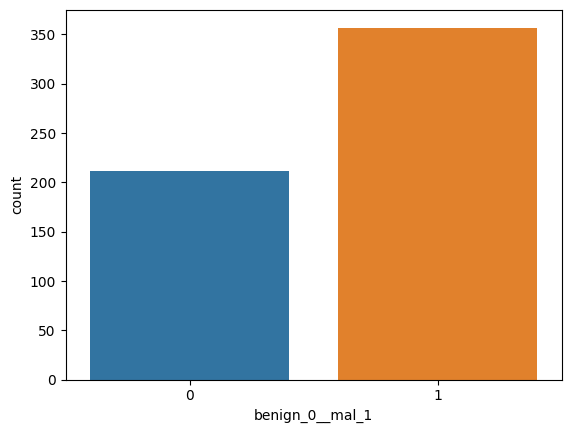

In [7]:
sns.countplot(x = matrix_data["benign_0__mal_1"])

In [10]:
matrix_data.corr(numeric_only = True).abs()["benign_0__mal_1"].sort_values().drop(index = "benign_0__mal_1")

symmetry error             0.006522
texture error              0.008303
mean fractal dimension     0.012838
smoothness error           0.067016
fractal dimension error    0.077972
concavity error            0.253730
compactness error          0.292999
worst fractal dimension    0.323872
mean symmetry              0.330499
mean smoothness            0.358560
concave points error       0.408042
mean texture               0.415185
worst symmetry             0.416294
worst smoothness           0.421465
worst texture              0.456903
area error                 0.548236
perimeter error            0.556141
radius error               0.567134
worst compactness          0.590998
mean compactness           0.596534
worst concavity            0.659610
mean concavity             0.696360
mean area                  0.708984
mean radius                0.730029
worst area                 0.733825
mean perimeter             0.742636
worst radius               0.776454
mean concave points        0

<Axes: >

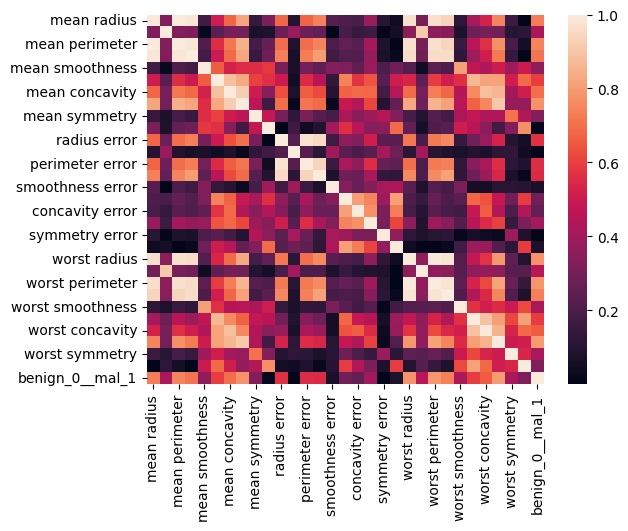

In [15]:
sns.heatmap(data = matrix_data.corr(numeric_only = True).abs())

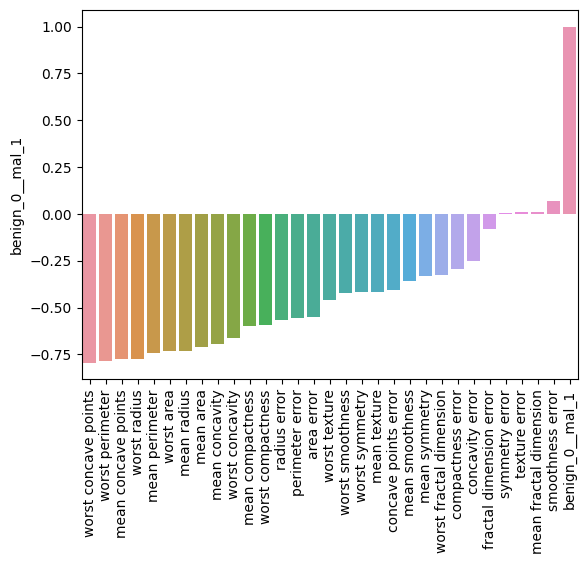

In [24]:
sns.barplot(x = matrix_data.corr(numeric_only = True)["benign_0__mal_1"].sort_values().index, y = matrix_data.corr(numeric_only = True)["benign_0__mal_1"].sort_values())
plotter.xticks(rotation = 90);

In [25]:
features = matrix_data.drop("benign_0__mal_1", axis = 1)
label = matrix_data["benign_0__mal_1"]

In [26]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, random_state = 42, test_size = 0.2)

In [27]:
scaler = StandardScaler()
s_feature_train = scaler.fit_transform(feature_train)
s_feature_test = scaler.transform(feature_test)

In [29]:
deep_learner = Sequential()
deep_learner.add(Dense(30, activation = "relu"))
deep_learner.add(Dense(15, activation = "relu"))
deep_learner.add(Dense(1, activation = "sigmoid"))
deep_learner.compile(optimizer = "adam", loss = "binary_crossentropy")

In [31]:
deep_learner.fit(x = s_feature_train, y = label_train, epochs = 500, validation_data = (s_feature_test, label_test))

Epoch 1/500
15/15 [==============================] - 2s 31ms/step - loss: 0.7337 - val_loss: 0.5828
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 0.5048 - val_loss: 0.4215
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3727 - val_loss: 0.3174
Epoch 4/500
15/15 [==============================] - 0s 7ms/step - loss: 0.2795 - val_loss: 0.2402
Epoch 5/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2128 - val_loss: 0.1839
Epoch 6/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1662 - val_loss: 0.1452
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1359 - val_loss: 0.1209
Epoch 8/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1165 - val_loss: 0.1041
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1024 - val_loss: 0.0939
Epoch 10/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0919 - val_loss: 0.0872
Epoch

In [32]:
losses = pan.DataFrame(deep_learner.history.history)

<Axes: >

<Figure size 1600x600 with 0 Axes>

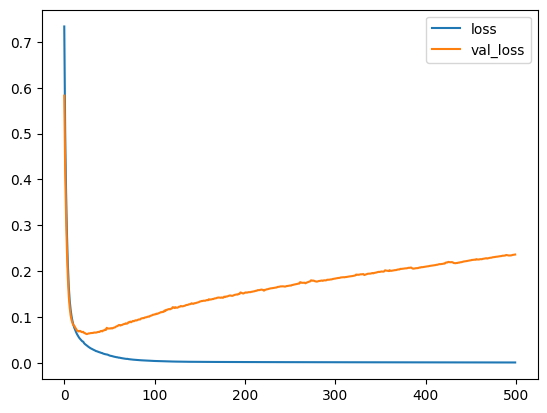

In [36]:
losses.plot()

In [37]:
deep_learner_two = Sequential()
deep_learner_two.add(Dense(30, activation = "relu"))
deep_learner_two.add(Dense(15, activation = "relu"))
deep_learner_two.add(Dense(1, activation = "sigmoid"))
deep_learner_two.compile(optimizer = "adam", loss = "binary_crossentropy")

In [39]:
stopper = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20)
deep_learner_two.fit(x = s_feature_train, y = label_train, epochs = 500, validation_data = (s_feature_test, label_test), callbacks = [stopper])

Epoch 1/500
15/15 [==============================] - 1s 14ms/step - loss: 0.7205 - val_loss: 0.5481
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4979 - val_loss: 0.3795
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 0.3490 - val_loss: 0.2694
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2547 - val_loss: 0.1942
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1950 - val_loss: 0.1502
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1589 - val_loss: 0.1229
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1319 - val_loss: 0.1062
Epoch 8/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1139 - val_loss: 0.0956
Epoch 9/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1005 - val_loss: 0.0893
Epoch 10/500
15/15 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 0.0836
Epoch 11

<Axes: >

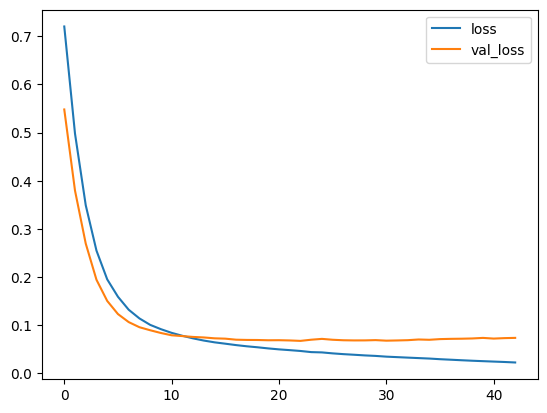

In [43]:
pan.DataFrame(deep_learner_two.history.history).plot()

In [41]:
deep_learner_three = Sequential()
deep_learner_three.add(Dense(30, activation = "relu"))
deep_learner_three.add(Dropout(0.5))#might want to use np.random.rand
deep_learner_three.add(Dense(15, activation = "relu"))
deep_learner_three.add(Dropout(0.5))
deep_learner_three.add(Dense(1, activation = "sigmoid"))
deep_learner_three.compile(optimizer = "adam", loss = "binary_crossentropy")

In [42]:
deep_learner_three.fit(x = s_feature_train, y = label_train, epochs = 500, validation_data = (s_feature_test, label_test), callbacks = [stopper])

Epoch 1/500
15/15 [==============================] - 2s 14ms/step - loss: 0.7784 - val_loss: 0.5163
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6285 - val_loss: 0.4260
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 0.5614 - val_loss: 0.3643
Epoch 4/500
15/15 [==============================] - 0s 7ms/step - loss: 0.4727 - val_loss: 0.3223
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4667 - val_loss: 0.2862
Epoch 6/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4179 - val_loss: 0.2555
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 0.3642 - val_loss: 0.2278
Epoch 8/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3484 - val_loss: 0.2000
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3320 - val_loss: 0.1776
Epoch 10/500
15/15 [==============================] - 0s 5ms/step - loss: 0.3212 - val_loss: 0.1586
Epoch 11

<Axes: >

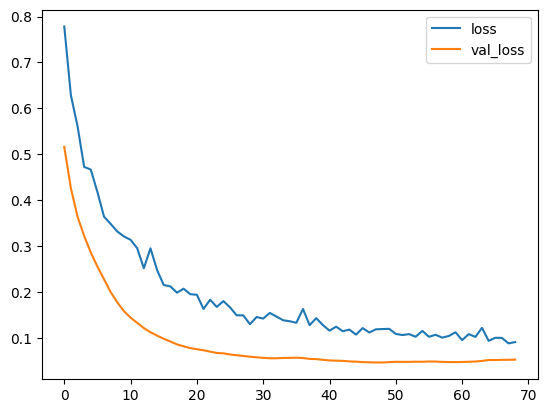

In [44]:
pan.DataFrame(deep_learner_three.history.history).plot()

In [47]:
#lets use an svm
svm_subgridder = SVC(kernel = "rbf")
param_grid = {"C" : [0.001, 0.01, 1, 10, 100], "gamma": ["scale", "auto"]}
gridder = GridSearchCV(svm_subgridder, param_grid, scoring = "precision")
gridder.fit(s_feature_train, label_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': ['scale', 'auto']},
             scoring='precision')

In [48]:
gridder.best_estimator_

SVC(C=1)

In [52]:
deep_preds = np.where(deep_learner_three.predict(s_feature_test) > 0.5, 1, 0)

4/4 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



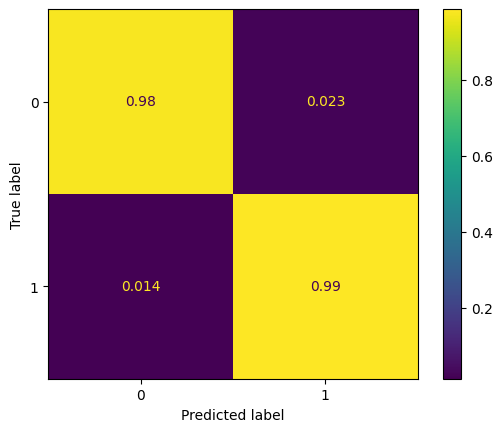

In [55]:
print(classification_report(label_test, deep_preds))
ConfusionMatrixDisplay.from_predictions(label_test, deep_preds, normalize = "true")

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



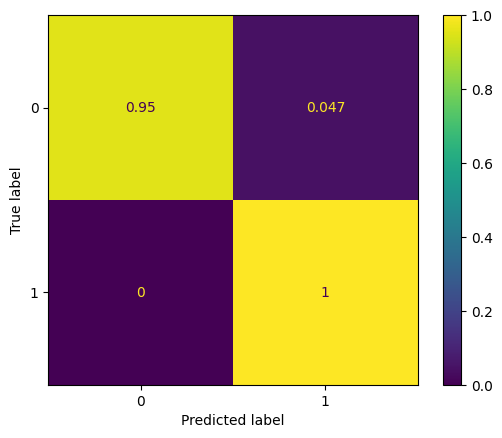

In [56]:
svc_preds = gridder.predict(s_feature_test)
print(classification_report(label_test, svc_preds))
ConfusionMatrixDisplay.from_predictions(label_test, svc_preds, normalize = "true")